In [55]:
from sklearn.datasets import fetch_openml
import numpy as np
np.random.seed942

In [3]:
mnist = fetch_openml('mnist_784', version = 1)
# mnist

In [4]:
len(mnist['data'])

70000

In [5]:
len(mnist['data'][0])

784

In [6]:
x,y = mnist['data'],mnist['target']

In [7]:
import matplotlib.pyplot as plt

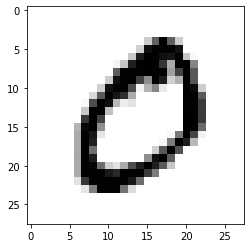

In [8]:
x_ =x[1].reshape(28,28)
plt.imshow(x_, cmap ='binary')

# Splitting the data in test and train set

In [9]:
x_train,x_test = x[:60000],x[60000:]
y_train,y_test = y[:60000],y[60000:]

# Shuffling the data

In [67]:
np.random.seed(42)
shuffled_index = np.random.permutation(60000)
x_train = x_train[shuffled_index]
y_train = y_train[shuffled_index]
y_train[:30]

array(['1', '9', '8', '3', '7', '9', '2', '2', '7', '0', '8', '9', '7',
       '6', '6', '4', '9', '5', '3', '0', '4', '6', '9', '4', '7', '0',
       '8', '0', '9', '3'], dtype=object)

In [68]:
y_train_5 = (y_train == '5')

In [69]:
np.unique(y_train_5, return_counts=True)

(array([False,  True]), array([54579,  5421]))

In [70]:
shuffled_index

array([12628, 37730, 39991, ...,   860, 15795, 56422])

In [71]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2') 

In [72]:
sgd_clf.fit(x_train,y_train_5)

SGDClassifier()

In [15]:
SGDClassifier?

Init signature:
SGDClassifier(
    loss='hinge',
    *,
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    n_jobs=None,
    random_state=None,
    learning_rate='optimal',
    eta0=0.0,
    power_t=0.5,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    warm_start=False,
    average=False,
)
Docstring:     
Linear classifiers (SVM, logistic regression, etc.) with SGD training.

This estimator implements regularized linear models with stochastic
gradient descent (SGD) learning: the gradient of the loss is estimated
each sample at a time and the model is updated along the way with a
decreasing strength schedule (aka learning rate). SGD allows minibatch
(online/out-of-core) learning via the `partial_fit` method.
For best results using the default learning rate schedule, the data should
have zero mean and unit variance.



In [16]:
import pandas as pd

In [17]:
x1 = {'x_cord': pd.Series([0,1]), 'y_cord': pd.Series([0,1])}
y = [0,1]
x = pd.DataFrame(x1)

In [18]:
x

,x_cord,y_cord
0,0,0
1,1,1


In [19]:
import matplotlib.pyplot as plt

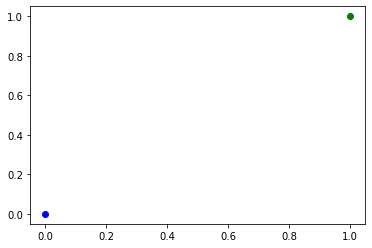

In [20]:
plt.plot(x['x_cord'][0],x['y_cord'][0], 'bo')
plt.plot(x['x_cord'][1],x['y_cord'][1], 'go')
plt.show()

In [21]:
sgd_clf.fit(x,y)

SGDClassifier()

In [23]:
a = np.linspace(0,1,11)
# a = np.c_[a,a]
# b = sgd_clf.predict(a)
# b

In [24]:
b = (-a*sgd_clf.coef_[0][0]- sgd_clf.intercept_[0])/sgd_clf.coef_[0][1]

In [25]:
l = [b[-1],b[-1]]
l

[0.01398803791019372, 0.01398803791019372]

In [26]:
b

array([1.01398804, 0.91398804, 0.81398804, 0.71398804, 0.61398804,
       0.51398804, 0.41398804, 0.31398804, 0.21398804, 0.11398804,
       0.01398804])

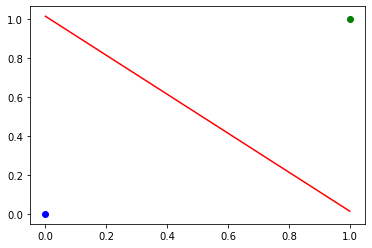

In [27]:
plt.plot(x['x_cord'][0],x['y_cord'][0], 'bo')
plt.plot(x['x_cord'][1],x['y_cord'][1], 'go')
plt.plot(a,b,'r-')
plt.show()

In [29]:
sgd_clf.predict([[2.5,2]])

array([1])

# 5 not 5 classifier

In [30]:
sgd_clf.fit(x_train,y_train_5)

SGDClassifier()

In [73]:
y_train_5[:30]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [76]:
sgd_clf.predict(x_test[16].reshape(-1,784))

array([False])

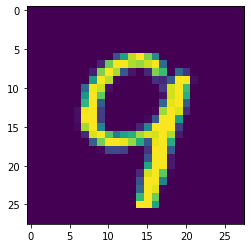

In [77]:
plt.imshow(x_test[16].reshape(28,28))